
<div align="center">
  <h1>Titanic Survival Prediction</h1>
</div>


In [1]:
import pandas as p

In [3]:
train = p.read_csv('train.csv')
test = p.read_csv('test.csv')
passengerid = test['PassengerId']

In [4]:
print(train.columns.tolist())



['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
train.head() # Gives the first 5 rows of the dataset
train.shape # (891, 12)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.shape # (418, 11)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train = train.drop(columns=['Name', 'Cabin'])
test = test.drop(columns=['Name', 'Cabin'])

In [8]:
train_age_mean = train['Age'].mean()
test_age_mean = test['Age'].mean()
train['Age'].fillna(train_age_mean, inplace=True)
test['Age'].fillna(test_age_mean, inplace=True)

In [9]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [10]:
train.drop(columns='PassengerId', inplace=True)
test.drop(columns='PassengerId', inplace=True)

<Axes: xlabel='Pclass', ylabel='Count'>

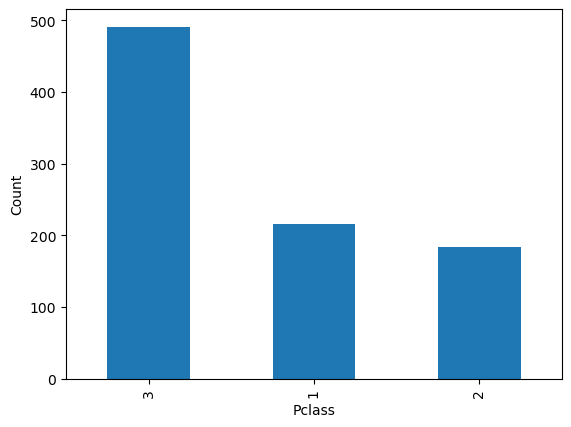

In [11]:
#EDA
Pclass_count = train.Pclass.value_counts()
Pclass_count.plot(kind='bar', xlabel='Pclass', ylabel='Count')

<Axes: xlabel='Sex', ylabel='Count'>

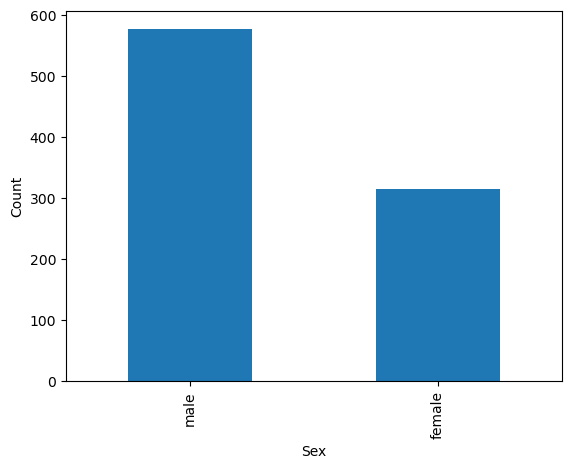

In [12]:
sex_count = train.Sex.value_counts()
sex_count.plot(kind='bar', xlabel='Sex', ylabel='Count')

<Axes: xlabel='Survived', ylabel='Count'>

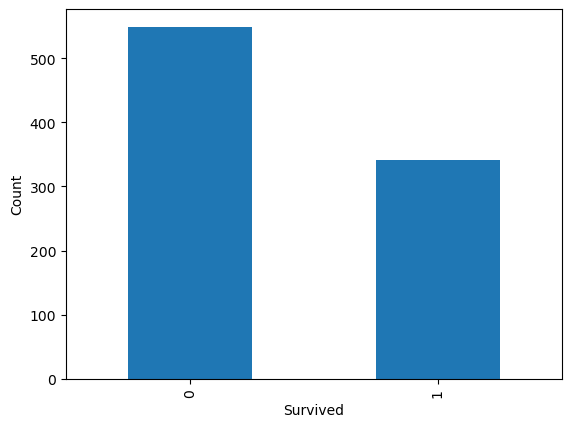

In [13]:
Survived_count = train.Survived.value_counts()
Survived_count.plot(kind='bar', xlabel='Survived', ylabel='Count')

<Axes: xlabel='Sex', ylabel='count'>

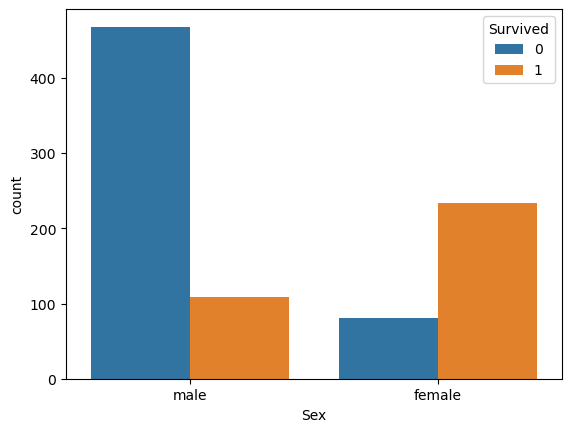

In [14]:
import seaborn as s
s.countplot(train, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

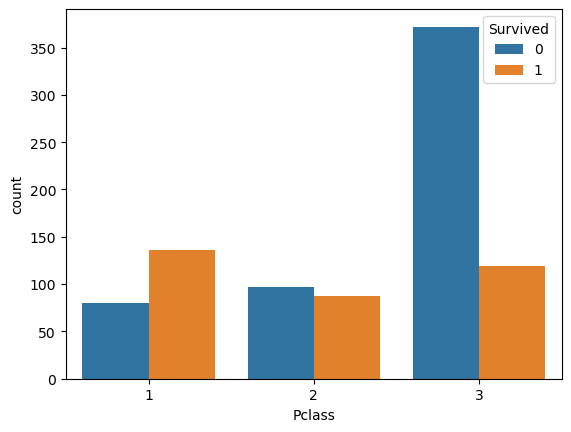

In [15]:
s.countplot(train, x='Pclass', hue='Survived')

In [16]:
train['Sex'].replace({'male':1, 'female': 0}, inplace=True)
test['Sex'].replace({'male':1, 'female': 0}, inplace=True)
train['Embarked'].replace({'S':2, 'C': 1, 'Q':0}, inplace=True)
test['Embarked'].replace({'S':2, 'C': 1, 'Q':0}, inplace=True)

In [17]:
print(train.columns.tolist())


['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [18]:
#drop Ticket column as it is not useful for prediction
train.drop(columns='Ticket', inplace=True)
test.drop(columns='Ticket', inplace=True)

In [19]:
#split the train set into features and labels.
y = train.Survived.copy()
X = train.drop(columns='Survived').copy()

In [20]:
#split this further into training and testing sets.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=786)

In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
dtc_prediction = dtc.predict(Xtest)
from sklearn.metrics import accuracy_score
dtc_score = accuracy_score(ytest, dtc_prediction)
dtc_score # 0.7486033519553073 (74% Not bad)

0.7541899441340782

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=15)
rfc.fit(Xtrain, ytrain)
rfc_prediction = rfc.predict(Xtest)
rfc_score = accuracy_score(ytest, rfc_prediction)
rfc_score # 0.7932960893854749

0.7821229050279329

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
lr_prediction = lr.predict(Xtest)
lr_score = accuracy_score(ytest, lr_prediction)
lr_score

0.7374301675977654